In [20]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from data_hmm import *
from util import *
from plots import *

In [21]:
T = 50
K = 3
D = 2
num_seqs = 1000
Ys = np.zeros((num_seqs, T, D))
Zs_true = np.zeros((num_seqs, T, K))
As_true = np.zeros((num_seqs, K, K))


for n in range(num_seqs):
    Y, mus_true, covs_true, Z, Pi, A = sampling_hmm(T, K, D)
    Ys[n] = Y.data.numpy()
    Zs_true[n] = Z.data.numpy()
    As_true[n] = A.data.numpy()
    if n % 100 == 0:
        print(n)

0
100
200
300
400
500
600
700
800
900


In [24]:
np.save('hmm_dataset/sequences', Ys)
np.save('hmm_dataset/transitions', As_true)
np.save('hmm_dataset/states', Zs_true)
np.save('hmm_dataset/means', mus_true.data.numpy())
np.save('hmm_dataset/covariances', covs_true.data.numpy())
np.save('hmm_dataset/init', Pi.data.numpy())

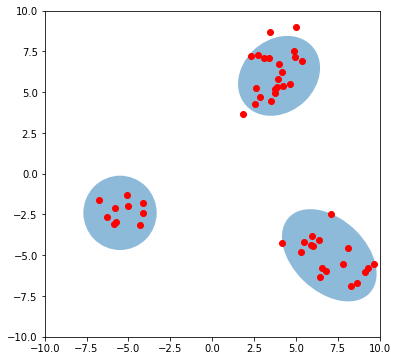

In [25]:
plot_clusters(Y, mus_true, covs_true)